
# Entrega 1
## Eliana Janneth Puerta Morales
## Juan Fernando Lopera Muñoz
## Valentina Muñoz Rincón



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Lectura del archivo

In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
df.head()
df_used = df.copy()

Contador de filas y columnas

In [5]:
num_filas = df_used["Elevation"].size

In [6]:
num_col = df_used.iloc[0].size #Numero de columnas
print("Numero de filas: {0} - Numero de columnas {1}".format(num_filas,num_col))

Numero de filas: 15120 - Numero de columnas 56


Columnas y su tipo de dato

In [7]:
df_info = df_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

## Simulación de datos para cumplir con el requisito de tener un 5% de datos faltantes en al menos 3 columnas

In [8]:
columns_to_simulate = ["Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Horizontal_Distance_To_Fire_Points"]
random_num = -1

for col in columns_to_simulate:
  for k in range(0,900):
    random_num = np.random.randint(0,high=15120)
    df_used.loc[random_num,col] = np.nan



Descripción de mediciones númericas por columna

In [9]:
df_description = df_used.describe()
df_description

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,14258.000000,14255.000000,14250.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,226.491934,51.019853,1712.492211,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.175426,61.300100,1324.596021,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1313.500000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,324.000000,79.000000,2259.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


## Columnas simuladas y la cantidad de NaN generados

In [14]:
list_na = df_used.columns[df_used.isna().any()].tolist()
list_na

for column in list_na:
  print(f"{column} : {df_used[column].isna().sum()}")

Horizontal_Distance_To_Hydrology : 862
Vertical_Distance_To_Hydrology : 865
Horizontal_Distance_To_Roadways : 870
Horizontal_Distance_To_Fire_Points : 870


## Comparación de los datos originales sin simular contra los datos simulados

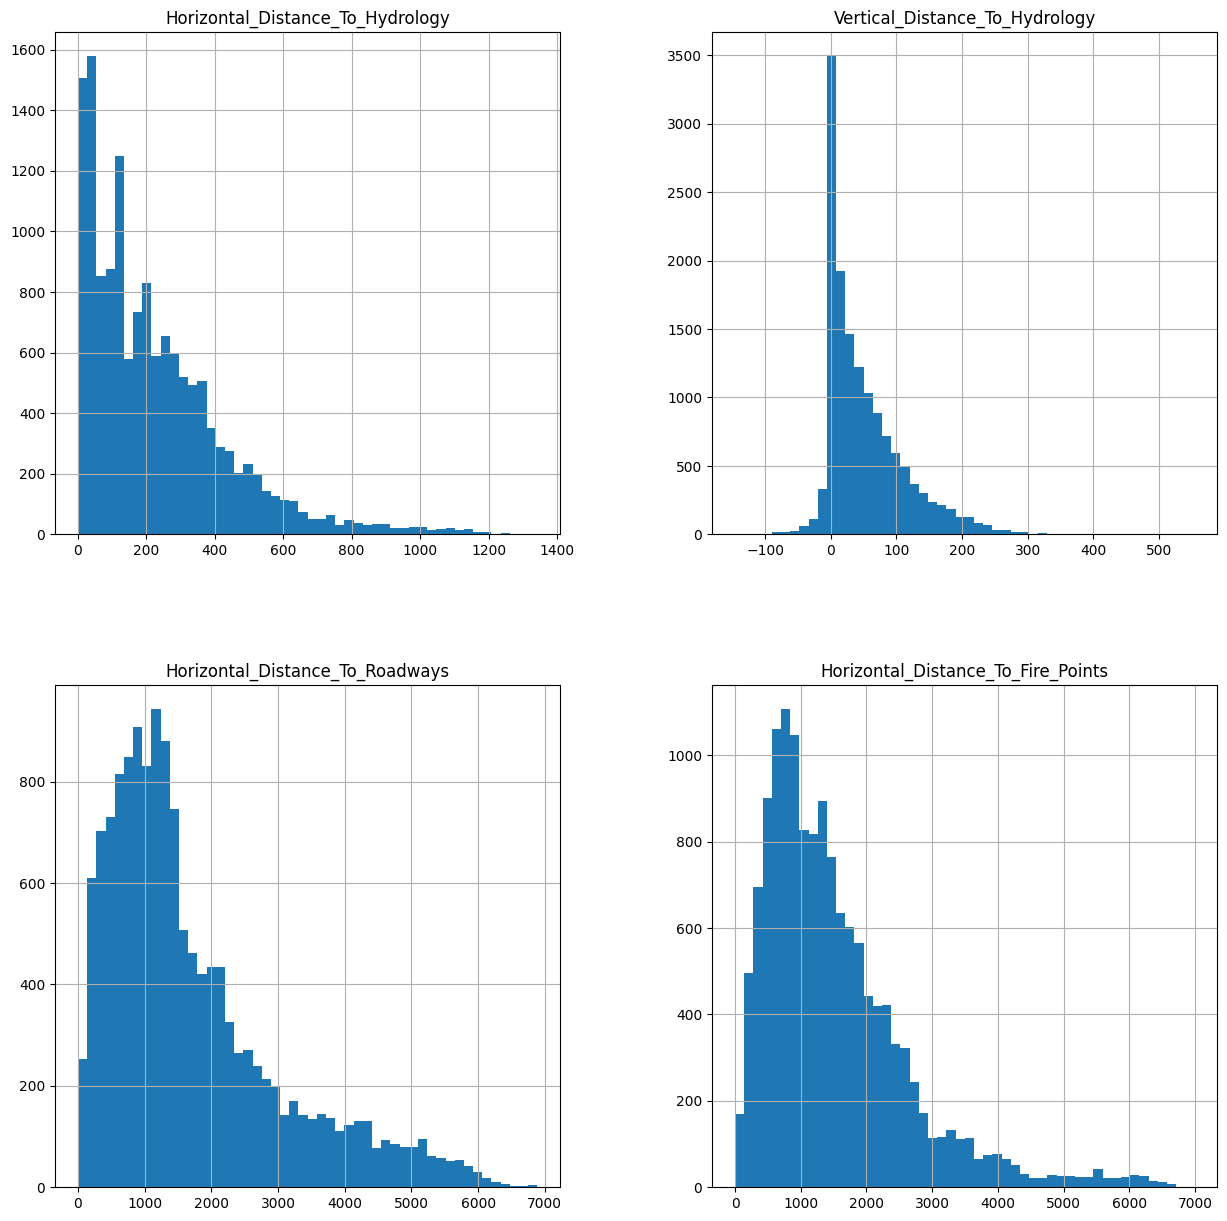

In [15]:
df_used.hist(column=list_na, figsize = (15,15), bins = 50)
plt.show()

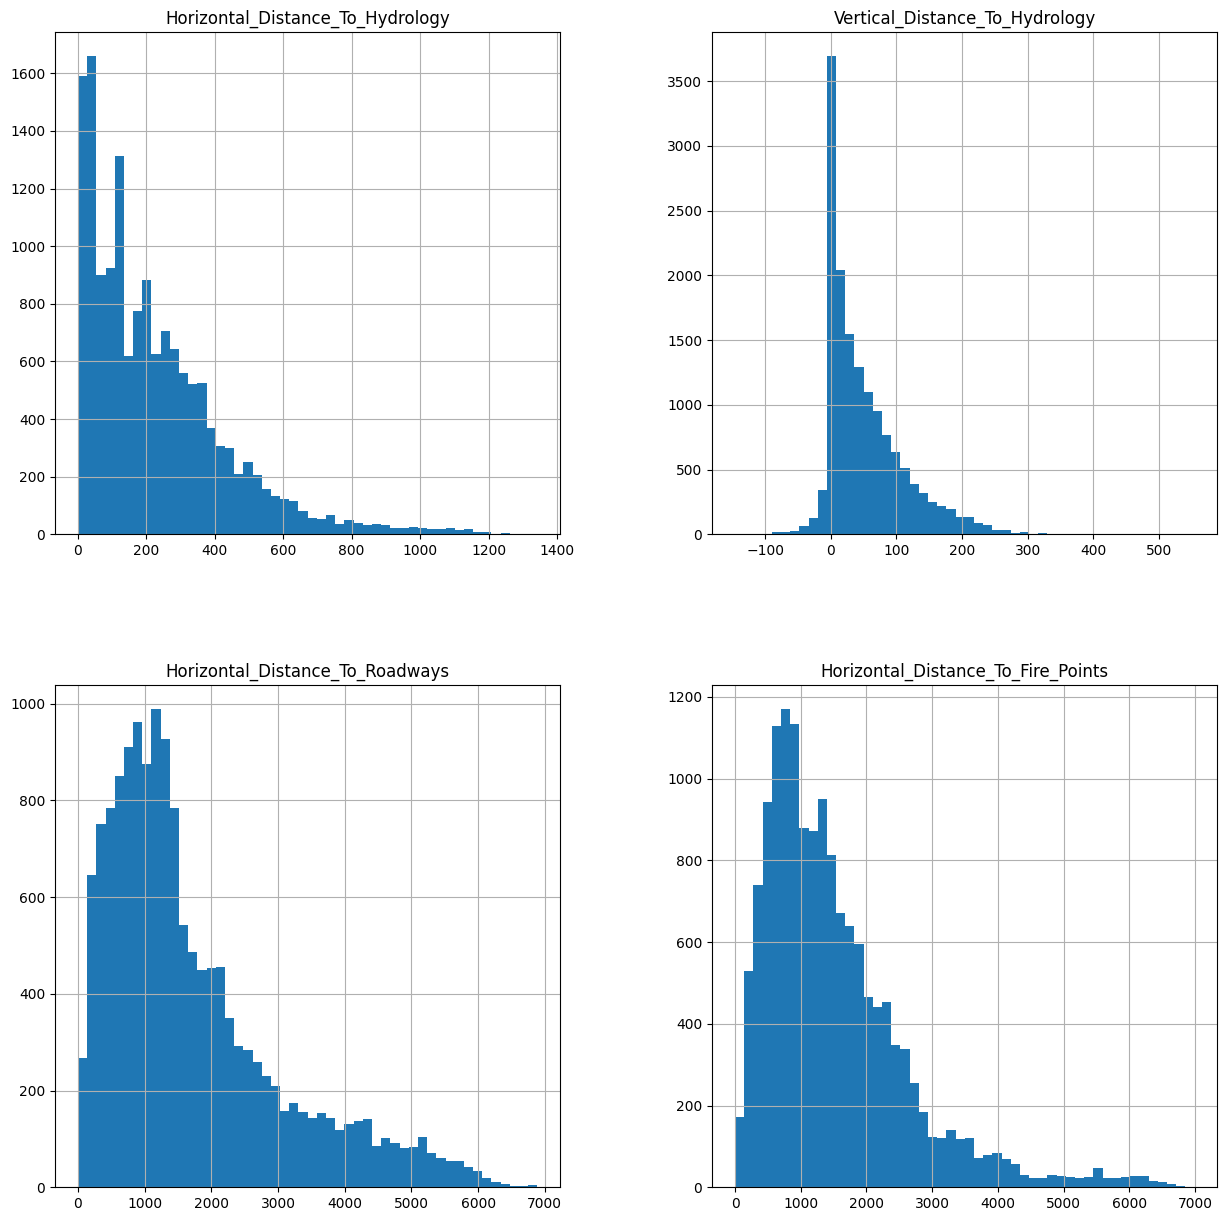

In [16]:
df.hist(column=list_na,figsize = (15,15), bins = 50)
plt.show()